**Part 1. AI Agent 이해와 입문 프로젝트**

- Chapter 03. LangGraph 입문 프로젝트

    - **📒[실습]** Clip 03. State - 할 일 목록을 관리하는 챗봇 만들기

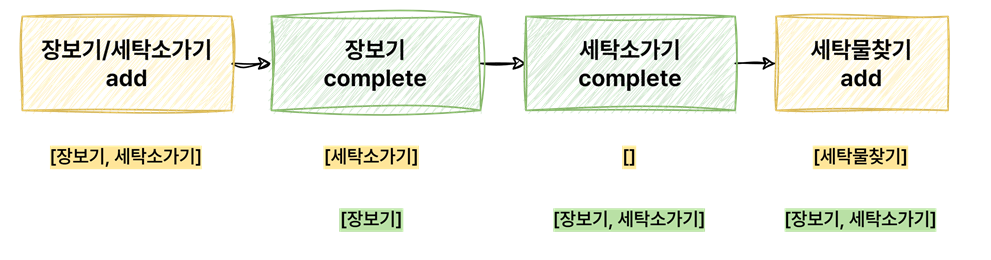

### Step 1: TODO 목록을 관리하기 위해 필요한 State 정의하기

In [1]:
from typing import Annotated
from operator import add

from typing_extensions import TypedDict

from langgraph.graph import StateGraph

class TodoState(TypedDict):
    user_input: str
    flag: str # 현재 동작에 대한 플래그 (할 일 추가 or 완료)
    todo_list: list[str]
    completed_list: Annotated[list[str], add]

### Step 2: 할 일을 추가하고 한 일은 지우는 역할 부여하기

In [2]:
def update_todo_list(state: TodoState) -> TodoState:
    # 현재 상태 값 불러오기
    user_input, flag = state["user_input"], state["flag"]
    todo_list = state["todo_list"]
    
    # flag에 따라 할 일 목록(todo_list)을 업데이트
    if flag == "add":
        todo_list.extend(user_input.split("/"))
    elif flag == "complete": 
        if user_input in todo_list:
            todo_list.remove(user_input)
    
    return {
        "user_input": user_input, 
        "flag": flag, 
        "todo_list": todo_list, 
        "completed_list": [user_input] if flag == "complete" else [] # 완료된 목록 add 될 수 있도록 리스트 업데이트
    }

### Step 3: 그래프 생성하기

In [3]:
graph_builder = StateGraph(TodoState)
graph_builder.add_node("update_todo", update_todo_list)
graph_builder.set_entry_point("update_todo")

graph = graph_builder.compile()

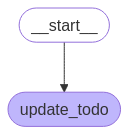

In [ ]:
graph

DO IT!

In [6]:
state = TodoState(user_input="", flag="", todo_list=[], completed_list=[]) # 초기 상태 설정

while True:
    try:
        user_input = input("User: ")
        print("User:", user_input)
        
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        
        flag = input("Flag: ")
        
        state = graph.invoke(
            {
            "user_input": user_input, 
            "flag": flag, 
            "todo_list": state["todo_list"], 
            "completed_list": state["completed_list"]
            }
        )
        print(state)

    except Exception as e:
        break

User: 마트가기/세탁소가기
{'user_input': '마트가기/세탁소가기', 'flag': 'add', 'todo_list': ['마트가기', '세탁소가기'], 'completed_list': []}
User: 마트가기
{'user_input': '마트가기', 'flag': 'complete', 'todo_list': ['세탁소가기'], 'completed_list': ['마트가기']}
User: 다이소가기
{'user_input': '다이소가기', 'flag': 'add', 'todo_list': ['세탁소가기', '다이소가기'], 'completed_list': ['마트가기']}
User: 세탁소가기
{'user_input': '세탁소가기', 'flag': 'complete', 'todo_list': ['다이소가기'], 'completed_list': ['마트가기', '세탁소가기']}
User: q
Goodbye!
